<a href="https://colab.research.google.com/github/vpapoglou/Machine-Learning-Auth/blob/main/%CE%95%CF%81%CE%B3%CE%B1%CF%83%CE%AF%CE%B11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Εισαγωγή Βιβλιοθηκών

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Ανέβασμα Δεδομένων

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


# Φόρτωση Δεδομένων

In [ ]:
dataset = pd.read_csv('diabetes.csv')
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# Περιγραφή Features

*   count - The number of not-empty values.
*   mean - The average (mean) value.
*   std - The standard deviation.
*   min - the minimum value.
*   25% - The 25% percentile*.
*   50% - The 50% percentile*.
*   75% - The 75% percentile*.
*   max - the maximum value.

*Percentile meaning: how many of the values are less than the given percentile.

In [ ]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Ιστόγραμμα για κάθε Feature & Ραβδόγραμμα για το Outcome

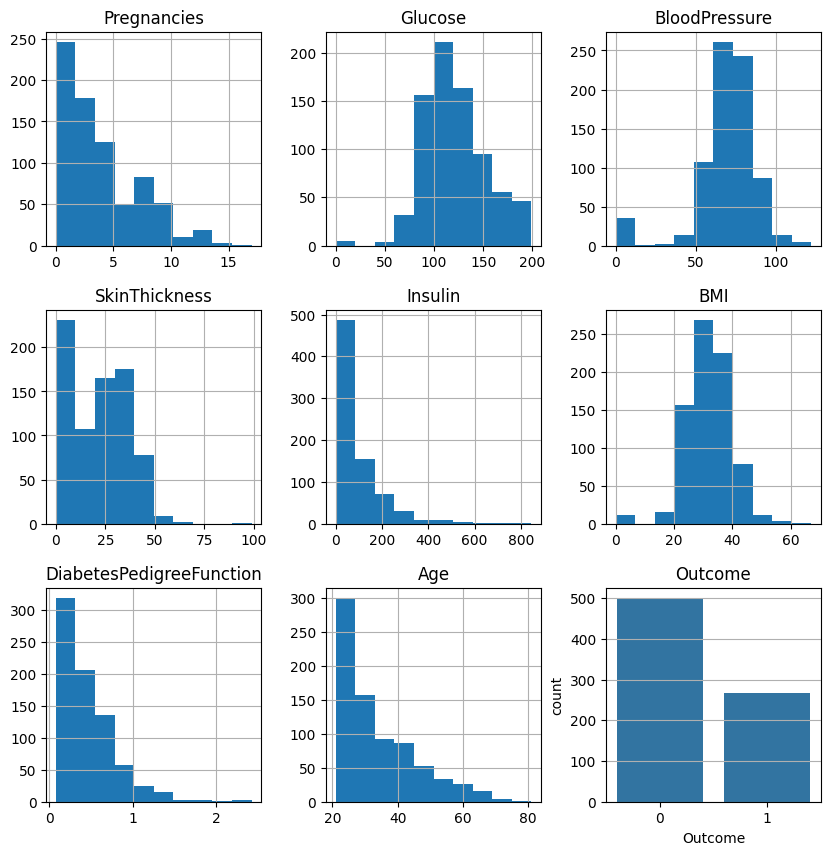

In [ ]:
dataset.hist(figsize=(10, 10))
sns.countplot(x='Outcome', data=dataset)
plt.show()

# 2. Ποιότητα Δεδομένων

Η σχέση μεταξύ input, output δεν είναι γραμμική(το Output έχει διακριτές τιμές) και τα input, output δεν ακολουθούν κατανομή Gauss. Επίσης στα δεδομένα υπάρχει πολύς θόρυβος που σημαίνει ότι χρειάζονται επεξεργασία καθώς σε κάποια features οι τιμές είναι μηδενικές ενώ είναι αδύνατον. Οπότε τα δεδομένα είναι κακής ποιότητας.

# 3. Κατανομή Ηλικίας

Η κατανομή ηλικίας δεν ακολουθεί κατανομή Gauss που είναι ικανή για πετυχημένες προβλέψεις αλλά βλέπουμε ανισομερή όγκο δεδομένων που να αφορά νεότερες ηλικίες. Άρα είναι δύσκολο να βγει ένα ικανοποιητικό αποτέλεσμα.

# 4. Συσχέτιση Γλυκόζης-Διαβήτη

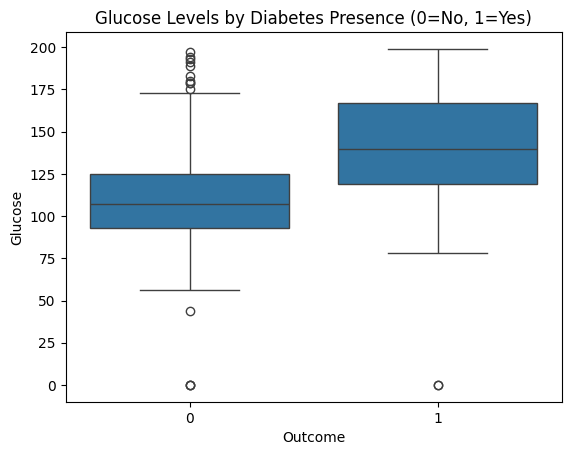

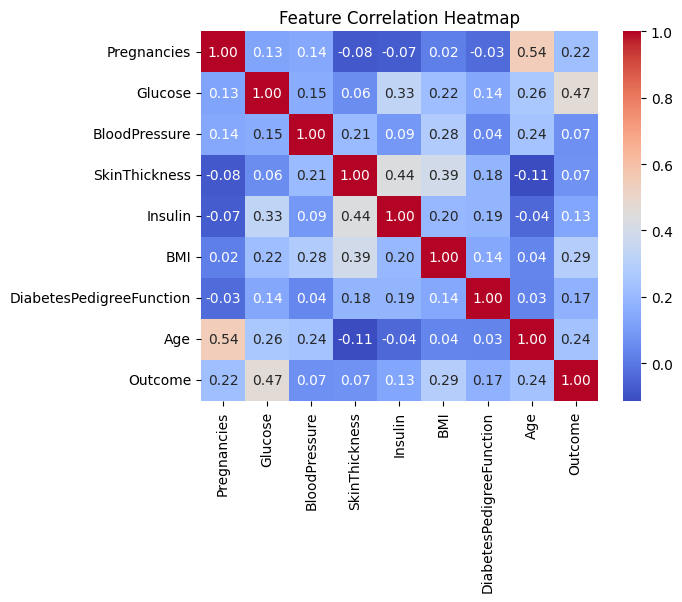

In [ ]:
sns.boxplot(x='Outcome', y='Glucose', data=dataset)
plt.title('Glucose Levels by Diabetes Presence (0=No, 1=Yes)')
plt.show()
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

Όπως φαίνεται στο πρώτο διάγραμμα υπάρχει συσχέτιση της αυξημένης γλυκόζης με τον διαβήτη ενώ αντίστοιχα στο δεύτερο heatmap γραφικό φαίνεται ότι ο διαβήτης συνδέεται με την γλυκόζη περισσότερο από κάθε άλλο χαρακτηριστικό.

# Δημιουργία Numpy Arrays & χωρισμός δεδομένων σε Train-Test (70%-30%)

In [ ]:
input_dataset = dataset.drop(columns=['Outcome'])
targets_dataset = dataset['Outcome']

x = input_dataset.to_numpy()
y = targets_dataset.to_numpy()

seed = 0
test_size = 0.3

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((537, 8), (537,), (231, 8), (231,))

#6. Δημιουργία, εκπαίδευση & πρόβλεψη Logistic Regression Μοντέλου

In [ ]:
model = LogisticRegression(max_iter=1000, random_state=seed)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
y_pred


array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0])

# Αξιολόγηση Logistic Regression Μοντέλου

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
accuracy_percentage = round(accuracy*100, 2)

print(f'The accuracy of the model is: {accuracy_percentage}')

The accuracy of the model is: 77.92


Η ακρίβεια που επιτυγχάνεται έχει περιθώρια βελτίωσης που μπορεί να επιτευχθεί είτε μεγαλώνοντας το δείγμα, είτε μεγαλώνοντας το ποσοστό του train δείγματος σε σχέση με το test.

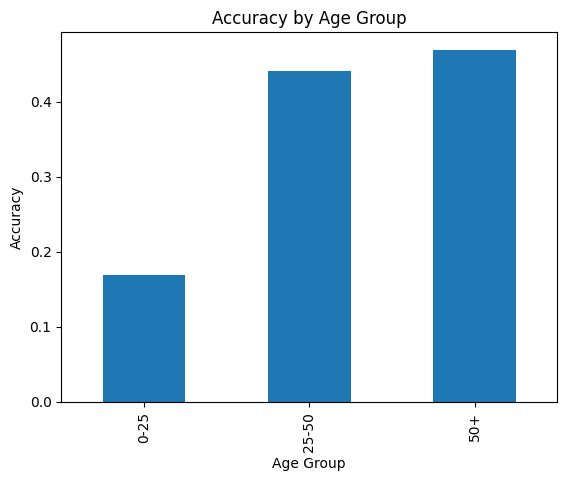

In [ ]:
age_groups = pd.cut(dataset['Age'], bins=[0, 25, 50, 100], labels=['0-25', '25-50', '50+'])
dataset['Age Group'] = age_groups
accuracy_per_age = dataset.groupby('Age Group', observed=True)['Outcome'].mean()
accuracy_per_age.plot(kind='bar')
plt.title('Accuracy by Age Group')
plt.ylabel('Accuracy')
plt.show()

# 7. Αξιολόγηση Ταξινομητή για πρόβλεψη με βάση την ηλικία

Παρατηρούμε πολύ μικρή απόδοση στην ομάδα των νέων σε σχέση με τις 2 μεγαλύτερες ηλικιακές ομάδες, χωρίς πάντως να είναι ικανοποιητικό το ποσοστό ακρίβειας ούτε στις υπόλοιπες. Πιθανόν το μοντέλο να πρέπει να εκπαιδευτεί με περισσότερα δεδομένα και καλύτερης ποιότητας.

# 8. Προτιμότερη περίπτωση λάθους

Στην περίπτωση που μελετάμε είναι προτιμότερο το μοντέλο να βγάλει ψευδώς θετικό έναν ασθενή παρά το αντίθετο αφού προκύπτει κίνδυνος για την ζωή του σε περίπτωση ψευδούς εφησυχασμού. Παρατηρείται ότι αν μεγαλώσουμε το δείγμα εκπαίδευσης, η ακρίβεια πρόβλεψης βελτιώνεται οπότε είναι μια λύση που θα πρέπει να διερευνηθεί.

#9. Αλλάζοντας την τυχαιότητα(seed) σε κάθε επανάληψη

In [ ]:
# Store results
accuracies = []
# Loop through seeds 0 to 9
for seed in range(10):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)

    model = LogisticRegression(max_iter=1000, random_state=seed)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    accuracy = accuracy_score(y_test, y_pred)
    accuracy_percentage = round(accuracy * 100, 2)

    print(f'Seed {seed}: Accuracy = {accuracy_percentage}%')
    accuracies.append(accuracy_percentage)
# print average accuracy
mean_accuracy = round(np.mean(accuracies), 2)
print(f'\nAverage accuracy across all seeds: {mean_accuracy}%')

Seed 0: Accuracy = 77.92%
Seed 1: Accuracy = 78.35%
Seed 2: Accuracy = 74.89%
Seed 3: Accuracy = 75.32%
Seed 4: Accuracy = 80.95%
Seed 5: Accuracy = 78.35%
Seed 6: Accuracy = 76.62%
Seed 7: Accuracy = 77.92%
Seed 8: Accuracy = 77.92%
Seed 9: Accuracy = 74.46%

Average accuracy across all seeds: 77.27%


#10. Κανονικοποίηση δεδομένων με χρήση Min-Max και εύρεση χαρακτηριστικών με μεγαλύτερη ακρίβεια πρόβλεψης

In [ ]:
from sklearn.preprocessing import MinMaxScaler

dataset = pd.read_csv('diabetes.csv')
X = dataset.drop(columns=['Outcome'])
y = dataset['Outcome']
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
# Convert back to DataFrame for easy viewing
X_scaled_dataset = pd.DataFrame(X_scaled, columns=X.columns)
dataset_scaled = pd.concat([X_scaled_dataset, y], axis=1)
dataset_scaled

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1
...,...,...,...,...,...,...,...,...,...
763,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,0.700000,0
764,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000,0
765,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,0.150000,0
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333,1


In [ ]:
correlations = dataset_scaled.corr()['Outcome'].sort_values(ascending=False)
print(correlations)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64


# Αξιολόγηση αποτελεσμάτων

Με την χρήση του γραφικού heatmap παραπάνω, είδαμε ως αποτέλεσμα μεγαλύτερης ακρίβειας πρόβλεψης διαβήτη στα χαρακτηριστικά: Γλυκόζη με 0.47, BMI με 0.29 και ηλικία με 0.24. Θα περίμενα ότι μετά την χρήση του αλγορίθμου κανονικοποίησης Min-Max, να πάρω ίσως τα χαρακτηριστικά με μεγαλύτερη ακρίβεια πρόβλεψης. Τελικά, τα αποτελέσματα παρέμειναν ίδια. Αυτό με οδηγεί στο συμπέρασμα ότι τα δεδομένα είχαν ικανοποιητικό βαθμό κανονικοποίησης και ισορροπίας χωρίς ακραίες τιμές και έτσι ο αλγόριθμος δεν βελτίωσε κάτι πραγματικά.

# ΜΕΡΟΣ 2 - ΓΡΑΜΜΙΚΗ ΠΑΛΙΝΔΡΟΜΗΣΗ

# 1. Δημιουργία Train-Test Δεδομένων (70% - 30%)

In [ ]:
input_dataset = dataset[['Pregnancies', 'BloodPressure', 'BMI', 'Age']]
targets_dataset = dataset['Glucose']

x = input_dataset.to_numpy()
y = targets_dataset.to_numpy()

seed = 0
test_size = 0.3

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((537, 4), (537,), (231, 4), (231,))

# 2. Εφαρμογή Γραμμικής Παλινδρόμησης και Μέτρηση ακρίβειας με κατάλληλες μετρικές

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')

Mean Squared Error (MSE): 929.89
Mean Absolute Error (MAE): 23.60


Θα προτιμούσα την MAE μετρική καθώς δίνει πιο καθαρή εικόνα για την μέση τιμή απόκλισης της πρόβλεψης της γλυκόζης (23.6) ενώ στην περίπτωση MSE όπου κάθε τιμή απόκλισης τετραγωνίζεται πριν αθροιστεί, υπάρχει μεγάλη ευαισθησία σε κάποια ακραία τιμή που όμως μπορεί να είναι εξαίρεση και όχι σύνηθες φαινόμενο στο dataset.

# 3. Εφαρμογή Lasso Regression με διαφορετικά βάρη λ

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

# Store results
accuracies = []
# Loop through seeds 0.2 to 1
for i in range(1, 6):
    a = i * 0.2
    model = Lasso(alpha=a)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    print(f'alpha: {a}')
    print(f'Mean Squared Error (MSE): {mse:.2f}')
    print(f'Mean Absolute Error (MAE): {mae:.2f} \n')
#

alpha: 0.2
Mean Squared Error (MSE): 929.72
Mean Absolute Error (MAE): 23.59 

alpha: 0.4
Mean Squared Error (MSE): 929.56
Mean Absolute Error (MAE): 23.59 

alpha: 0.6000000000000001
Mean Squared Error (MSE): 929.41
Mean Absolute Error (MAE): 23.58 

alpha: 0.8
Mean Squared Error (MSE): 929.27
Mean Absolute Error (MAE): 23.58 

alpha: 1.0
Mean Squared Error (MSE): 929.15
Mean Absolute Error (MAE): 23.57 



# 4. Αφαίρεση χαρακτηριστικού με την μικρότερη βαρύτητα και σύγκριση

# Κανονικοποίηση δεδομένων με χρήση Min-Max και εύρεση χαρακτηριστικών με μεγαλύτερη ακρίβεια πρόβλεψης

In [ ]:
from sklearn.preprocessing import MinMaxScaler

dataset = pd.read_csv('diabetes.csv')
X = dataset[['Pregnancies', 'BloodPressure', 'BMI', 'Age']]
y = dataset['Glucose']
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
# Convert back to DataFrame for easy viewing
X_scaled_dataset = pd.DataFrame(X_scaled, columns=X.columns)
dataset_scaled = pd.concat([X_scaled_dataset, y], axis=1)
dataset_scaled

,Pregnancies,BloodPressure,BMI,Age,Glucose
0,0.352941,0.590164,0.500745,0.483333,148
1,0.058824,0.540984,0.396423,0.166667,85
2,0.470588,0.524590,0.347243,0.183333,183
3,0.058824,0.540984,0.418778,0.000000,89
4,0.000000,0.327869,0.642325,0.200000,137
...,...,...,...,...,...
763,0.588235,0.622951,0.490313,0.700000,101
764,0.117647,0.573770,0.548435,0.100000,122
765,0.294118,0.590164,0.390462,0.150000,121
766,0.058824,0.491803,0.448584,0.433333,126


In [ ]:
correlations = dataset_scaled.corr()['Glucose'].sort_values(ascending=False)
print(correlations)

Glucose          1.000000
Age              0.263514
BMI              0.221071
BloodPressure    0.152590
Pregnancies      0.129459
Name: Glucose, dtype: float64


# Δημιουργία Train-Test Δεδομένων (70% - 30%) χωρίς το χαρακτηριστικό με την μικρότερη βαρύτητα (Pregnancies)

In [ ]:
input_dataset = dataset[['BloodPressure', 'BMI', 'Age']]
targets_dataset = dataset['Glucose']

x = input_dataset.to_numpy()
y = targets_dataset.to_numpy()

seed = 0
test_size = 0.3

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((537, 3), (537,), (231, 3), (231,))

# Εφαρμογή Γραμμικής Παλινδρόμησης και Μέτρηση ακρίβειας με κατάλληλες μετρικές

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')

Mean Squared Error (MSE): 930.40
Mean Absolute Error (MAE): 23.59


Τα αποτελέσματα αρχικά ήταν:
Mean Squared Error (MSE): 929.89,
Mean Absolute Error (MAE): 23.60
και αφαιρώντας το χαρακτηριστικό pregnancies διαμορφώθηκαν ως:
Mean Squared Error (MSE): 930.40,
Mean Absolute Error (MAE): 23.59